In [47]:
import os
print(os.listdir(r'E:\Programming\VS CODE\Python\7th_sem\Fabric Dataset\Dataset'))
dir = len(os.listdir(r'E:\Programming\VS CODE\Python\7th_sem\Fabric Dataset\Dataset'))
dir

['Muga', 'Tass']


2

In [48]:
train_Muga=r'E:/Programming/VS CODE/Python/7th_sem/Fabric Dataset/Dataset/Muga'
train_Tass=r'E:/Programming/VS CODE/Python/7th_sem/Fabric Dataset/Dataset/Tass'
valid_Muga=r'E:/Programming/VS CODE/Python/7th_sem/Fabric Dataset/Dataset/Muga'
valid_Tass=r'E:/Programming/VS CODE/Python/7th_sem/Fabric Dataset/Dataset/Tass'

# train_Muga='D:/code/7th_sem/Fabric Dataset/Train'
# valid_Muga='D:/code/7th_sem/Fabric Dataset/Test'

In [49]:
train_Muga_names = os.listdir(train_Muga)
print(train_Muga_names[:5])

train_Tass_names = os.listdir(train_Tass)
print(train_Tass_names[:5])

validation_Muga_names = os.listdir(valid_Muga)
print(validation_Muga_names[:5])

validation_Tass_names = os.listdir(valid_Tass)
print(validation_Tass_names[:5])

['M10_3_1.jpg', 'M10_3_10.jpg', 'M10_3_11.jpg', 'M10_3_2.jpg', 'M10_3_3.jpg']
['DSC_9633.JPG', 'DSC_9634.JPG', 'DSC_9635.JPG', 'DSC_9636.JPG', 'DSC_9637.JPG']
['M10_3_1.jpg', 'M10_3_10.jpg', 'M10_3_11.jpg', 'M10_3_2.jpg', 'M10_3_3.jpg']
['DSC_9633.JPG', 'DSC_9634.JPG', 'DSC_9635.JPG', 'DSC_9636.JPG', 'DSC_9637.JPG']


In [50]:
print('Total numbers of Muga images for Training :', len(os.listdir(train_Muga)))
print('Total numbers of Muga images for Validation :', len(os.listdir(valid_Muga)))

print('Total numbers of Tass images for Training :', len(os.listdir(train_Tass)))
print('Total numbers of Tass images for Validation :', len(os.listdir(valid_Tass)))

Total numbers of Muga images for Training : 399
Total numbers of Muga images for Validation : 399
Total numbers of Tass images for Training : 161
Total numbers of Tass images for Validation : 161


In [51]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 5
ncols = 5

pic_index = 0

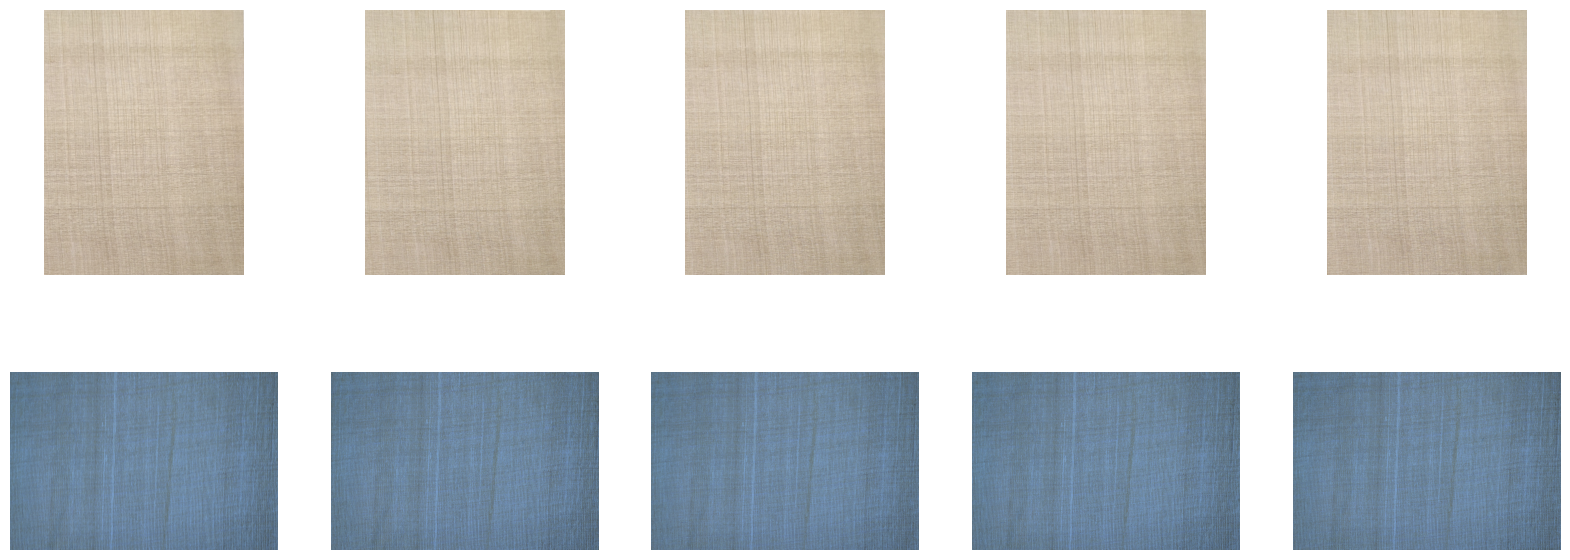

In [52]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 5
next_Muga_pic = [os.path.join(train_Muga, fname)
                for fname in train_Muga_names[pic_index-5:pic_index]]
next_Tass_pic = [os.path.join(train_Tass, fname)
                for fname in train_Tass_names[pic_index+15:pic_index+20]]

for i, img_path in enumerate(next_Muga_pic+next_Tass_pic):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#For Augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        'E:/Programming/VS CODE/Python/7th_sem/Fabric Dataset/Dataset',
        classes = ['Muga','Tass'],
        target_size=(200, 200),
        batch_size=120,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        'E:/Programming/VS CODE/Python/7th_sem/Fabric Dataset/Dataset',
        classes = ['Muga','Tass'],
        target_size=(200, 200),
        batch_size=19,
        class_mode='binary',
        shuffle=False)


Found 560 images belonging to 2 classes.
Found 560 images belonging to 2 classes.


In [54]:
import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [55]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid) 
])

In [60]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 99, 99, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 23, 23, 64)       

In [61]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [64]:
history = model.fit(train_generator,
      steps_per_epoch=5,
      epochs=5, #10,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=2)


Epoch 1/5
5/5 [==============================] - 43s 8s/step - loss: 0.5965 - accuracy: 0.7125 - val_loss: 0.2716 - val_accuracy: 1.0000
Epoch 2/5
5/5 [==============================] - 43s 8s/step - loss: 0.5916 - accuracy: 0.7125 - val_loss: 0.2718 - val_accuracy: 1.0000
Epoch 3/5
5/5 [==============================] - 42s 9s/step - loss: 0.5957 - accuracy: 0.7125 - val_loss: 0.2273 - val_accuracy: 1.0000
Epoch 4/5
5/5 [==============================] - 43s 8s/step - loss: 0.6003 - accuracy: 0.7125 - val_loss: 0.3328 - val_accuracy: 1.0000
Epoch 5/5
5/5 [==============================] - 42s 8s/step - loss: 0.5979 - accuracy: 0.7125 - val_loss: 0.2033 - val_accuracy: 1.0000


In [65]:
model.evaluate(validation_generator)

30/30 [==============================] - 34s 1s/step - loss: 0.5932 - accuracy: 0.7125


[0.5931738615036011, 0.7124999761581421]

In [66]:
preds = model.predict(validation_generator)

30/30 [==============================] - 34s 1s/step


In [67]:
fpr, tpr, _ = roc_curve(train_generator.classes, preds)

In [68]:
roc_auc = auc(fpr, tpr)

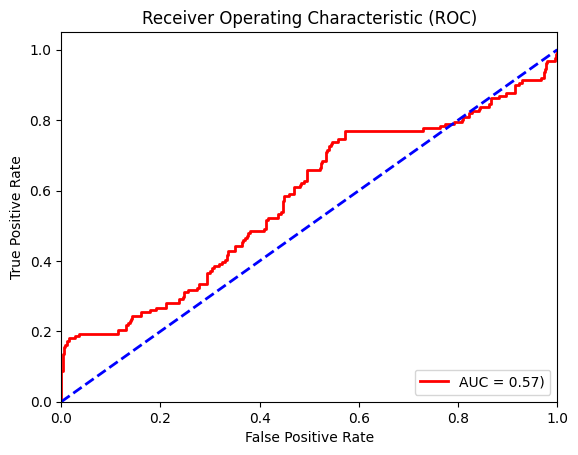

In [69]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

1/1 [==============================] - 0s 84ms/step
[[0.]]
E:/Programming/VS CODE/Python/7th_sem/Fabric Dataset/Dataset/Tass/T4_3_9.jpg - This is an image of an Muga Fabric


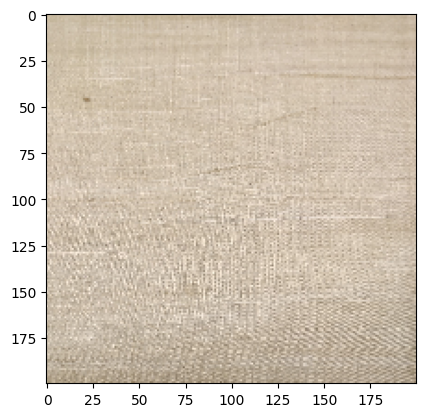

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

# Upload images and make predictions
uploaded_files = [train_Tass+"/"+train_Tass_names[160]] 
for fn in uploaded_files:
    path = fn
    img = image.load_img(path, target_size=(200, 200))
    x = image.img_to_array(img)
    plt.imshow(x/255.)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images)
    print(classes)
    if classes[0] < 0.5:
        print(fn + " - This is an image of an Muga Fabric")
    else:
        print(fn + " - This is an image of a Tass Fabric")


In [112]:
model.save(r"E:\Programming\VS CODE\Python\7th_sem\Classification\Test\saved_model\cnn_model.h5")

c:\Users\Wrishav\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
